In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_pop = pd.read_csv("F2002.csv")
df_pop.head()

,Statistic Label,CensusYear,County,UNIT,VALUE
0,Average Number of Persons per Private Househol...,1971,Co. Clare,Number,3.81
1,Average Number of Persons per Private Househol...,1971,Co. Cork,Number,3.93
2,Average Number of Persons per Private Househol...,1971,Co. Cavan,Number,3.64
3,Average Number of Persons per Private Househol...,1971,Co. Carlow,Number,4.17
4,Average Number of Persons per Private Househol...,1971,Co. Donegal,Number,3.90


In [3]:
df_reg = pd.read_csv("Regions.csv")

In [4]:
#Using 'ffill' method in the column with Regions to fill NAs with the last valid value 
df_reg["Name of region "] = df_reg["Name of region "].fillna(method='ffill')
df_reg.sample(8)

,Name of region,Constituent counties,Type of area
36,South-West,Kerry,Administrative county
12,Mid-East,Kildare,Administrative county
33,South-East,NaN,NaN
5,Border,Sligo,Administrative county
7,Dublin,Dublin,City
26,Mid-West,NaN,NaN
9,Dublin,Fingal,Administrative county
20,Midlands,NaN,NaN


In [5]:
df_reg = df_reg.dropna()

In [6]:
# North Tiperrary and South Tiperrary contain additional space at the end, just remove it
df_reg["Constituent counties"] = df_reg["Constituent counties"].str.replace(f'Tipperary ', 'Tipperary')

In [7]:
#final check
df_reg["Constituent counties"].unique()

array(['Cavan', 'Donegal', 'Leitrim', 'Louth', 'Monaghan', 'Sligo',
       'Dublin', 'Dún Laoghaire-Rathdown', 'Fingal', 'South Dublin',
       'Kildare', 'Meath', 'Wicklow', 'Laois', 'Longford', 'Offaly',
       'Westmeath', 'Clare', 'Limerick', 'North Tipperary', 'Tipperary',
       'Carlow', 'Kilkenny', 'South Tipperary', 'Waterford', 'Wexford',
       'Cork', 'Kerry', 'Galway', 'Mayo', 'Roscommon'], dtype=object)

In [8]:
df_pop = pd.read_csv("F2002.csv")

In [9]:
df_pop['County'] = df_pop['County'].str.replace('.', '')
df_pop['County'] = df_pop['County'].str.replace('Co ', '')
df_pop.County.unique()

array(['Clare', 'Cork', 'Cavan', 'Carlow', 'Donegal', 'Dublin', 'Galway',
       'Kildare', 'Kilkenny', 'Kerry', 'Longford', 'Louth', 'Limerick',
       'Leitrim', 'Laois', 'Meath', 'Monaghan', 'Mayo', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Wicklow',
       'Westmeath', 'Wexford', 'Ireland'], dtype=object)

In [10]:
#column Region  will be created in the dataFrame

#Function is working with 2 dataframes as arguments:
#for eah element from column "County" in the df_it will check if there is according name in 
#"Constituent counties" column from df_reg
#and if so value from column "Name of region" will be taken for new column

def create_region_column(df_it, df_reg):
    df_it['Region'] = df_it['County'].apply(
        lambda x: df_reg.loc[df_reg['Constituent counties'] == x, 'Name of region '].iloc[0] 
        if x in df_reg['Constituent counties'].to_list() else x)
    return df_it

In [11]:
#applying fuction to current dataframe and checking if new column is created with correct values
df_pop = create_region_column(df_pop, df_reg)

In [12]:
#replacing the counties with regions and checking 
df_pop["County"] = df_pop["Region"]

In [13]:
df_pop = df_pop.rename(columns={'County': 'Name of Region'})
df_pop = df_pop.drop(columns=["Region"])
df_pop["Name of Region"].unique()

array(['Mid-West', 'South-West', 'Border', 'South-East', 'Dublin', 'West',
       'Mid-East', 'Midlands', 'Ireland'], dtype=object)

In [14]:
# Group the DataFrame by the 'Statistic Label', 'CensusYear', 'Name of Region', and 'UNIT' columns
df_grouped = df_pop.groupby(['Statistic Label','CensusYear', 'Name of Region','UNIT'])

# Calculate the mean of the 'VALUE' column for each group
df_agg = df_grouped['VALUE'].mean()

In [15]:
df_agg.head()

Statistic Label                                                             CensusYear  Name of Region  UNIT  
Average Number of Persons per Private Household in Permanent Housing Units  1971        Border          Number    3.726667
                                                                                        Dublin          Number    3.940000
                                                                                        Ireland         Number    3.940000
                                                                                        Mid-East        Number    4.126667
                                                                                        Mid-West        Number    3.923333
Name: VALUE, dtype: float64

In [16]:
df_agg = df_agg.reset_index()
df_agg.head()

,Statistic Label,CensusYear,Name of Region,UNIT,VALUE
0,Average Number of Persons per Private Househol...,1971,Border,Number,3.726667
1,Average Number of Persons per Private Househol...,1971,Dublin,Number,3.940000
2,Average Number of Persons per Private Househol...,1971,Ireland,Number,3.940000
3,Average Number of Persons per Private Househol...,1971,Mid-East,Number,4.126667
4,Average Number of Persons per Private Househol...,1971,Mid-West,Number,3.923333


In [17]:
df_agg.CensusYear.unique()

array([1971, 1981, 1991, 2002, 2006, 2011, 2016, 2022], dtype=int64)

In [18]:
df_agg.describe(include = 'all')

,Statistic Label,CensusYear,Name of Region,UNIT,VALUE
count,72,72.000000,72,72,72.000000
unique,1,NaN,9,1,NaN
top,Average Number of Persons per Private Househol...,NaN,Border,Number,NaN
freq,72,NaN,8,72,NaN
mean,NaN,2000.000000,NaN,NaN,3.125000
std,NaN,16.638662,NaN,NaN,0.457813
min,NaN,1971.000000,NaN,NaN,2.650000
25%,NaN,1988.500000,NaN,NaN,2.731875
50%,NaN,2004.000000,NaN,NaN,2.921667
75%,NaN,2012.250000,NaN,NaN,3.556250


In [22]:
df_agg = df_agg.drop(df_agg[(df_agg["CensusYear"] != 2011) & (df_agg["CensusYear"] != 2016) &
                            (df_agg["CensusYear"] != 2022)].index)

In [23]:
df_agg.CensusYear.unique()

array([2011, 2016, 2022], dtype=int64)

In [26]:
df_agg.describe()

,CensusYear,VALUE
count,27.000000,27.000000
mean,2016.333333,2.740833
std,4.582576,0.083977
min,2011.000000,2.650000
25%,2011.000000,2.690000
50%,2016.000000,2.728333
75%,2022.000000,2.748750
max,2022.000000,2.966667


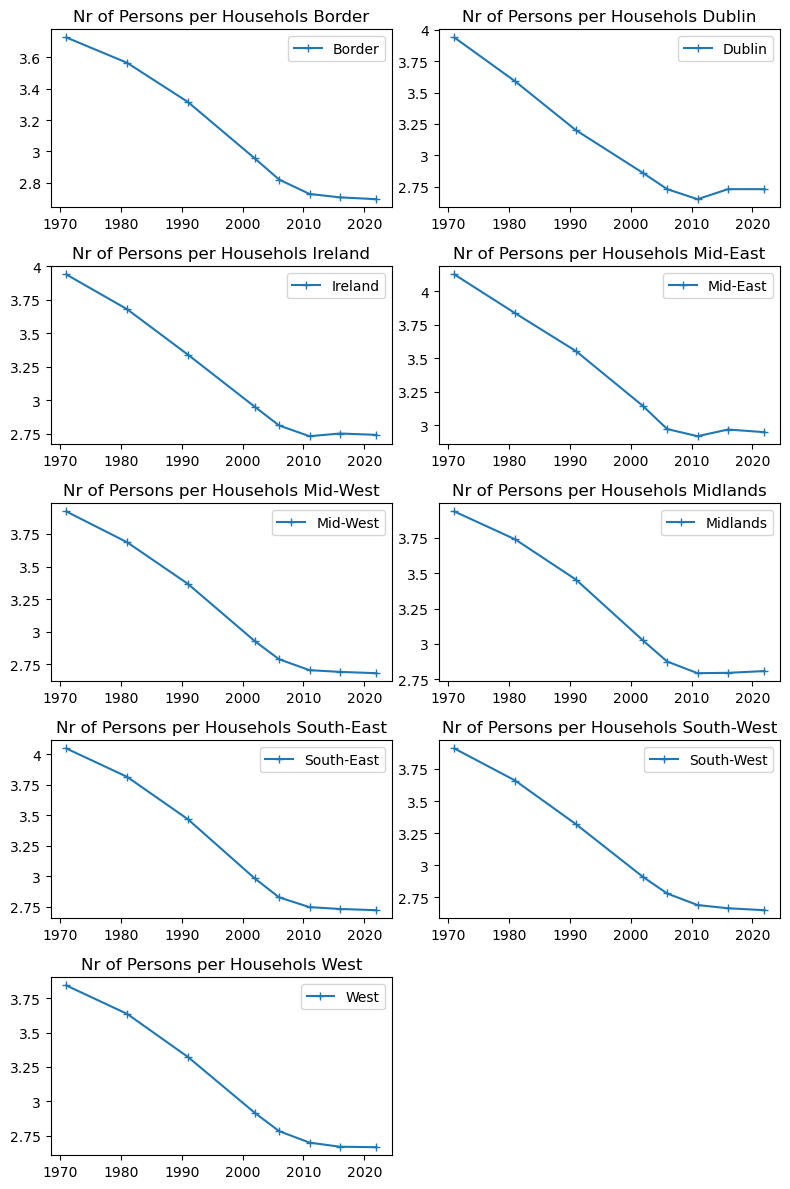

In [19]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(8, 12))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_agg['Name of Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_agg['Name of Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_agg[df_agg['Name of Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['CensusYear'], df_region['VALUE'],'+-', label=region)
    ax.legend()
    ax.set_title(f'Nr of Persons per Househols {region}')

    # Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

In [20]:
df_agg.to_csv("F2002_m.csv", index = False)

# second part 
#### interpolating NAs

In [354]:
df_pop = pd.read_csv("F2002_m.csv")

In [355]:
# Create a set to store the unique names of the regions
region_names = set()

# Iterate over the data frame and add each region name to the set
for region in df_pop['Name of Region']:
    region_names.add(region)

# Convert the set to a list
unique_region_names = list(region_names)

In [356]:
unique_region_names

['South-East',
 'Dublin',
 'Border',
 'West',
 'Mid-West',
 'Midlands',
 'South-West',
 'Mid-East',
 'Ireland']

In [357]:
df_pop.CensusYear.unique()

array([2011, 2016, 2022], dtype=int64)

In [358]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  27 non-null     object 
 1   CensusYear       27 non-null     int64  
 2   Name of Region   27 non-null     object 
 3   UNIT             27 non-null     object 
 4   VALUE            27 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ KB


In [359]:
years_to_interpolate = [2012, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021]

# Create a list of lists, where each sublist contains the values for a single row in the new data frame
data = []
for year in years_to_interpolate:
    for region in unique_region_names:
        row = [np.nan, year, region, np.nan, np.nan]
        data.append(row)

In [360]:
df = pd.DataFrame(data, columns=['Statistic Label', 'CensusYear', 'Name of Region', 'UNIT', 'VALUE'])

In [361]:
df.head()

,Statistic Label,CensusYear,Name of Region,UNIT,VALUE
0,NaN,2012,South-East,NaN,NaN
1,NaN,2012,Dublin,NaN,NaN
2,NaN,2012,Border,NaN,NaN
3,NaN,2012,West,NaN,NaN
4,NaN,2012,Mid-West,NaN,NaN


In [362]:
df_pop = pd.concat([df_pop, df], ignore_index=True)

In [363]:
df_pop.head()

,Statistic Label,CensusYear,Name of Region,UNIT,VALUE
0,Average Number of Persons per Private Househol...,2011,Border,Number,2.728333
1,Average Number of Persons per Private Househol...,2011,Dublin,Number,2.650000
2,Average Number of Persons per Private Househol...,2011,Ireland,Number,2.730000
3,Average Number of Persons per Private Househol...,2011,Mid-East,Number,2.916667
4,Average Number of Persons per Private Househol...,2011,Mid-West,Number,2.703333


In [364]:
df_pop = df_pop.drop(['Statistic Label', 'UNIT'], axis=1)

In [365]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_pop = df_pop.sort_values(by=['CensusYear',"Name of Region"], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_pop = df_pop.reset_index(drop=True)

In [366]:
df_pop.head(10)

,CensusYear,Name of Region,VALUE
0,2011,Border,2.728333
1,2011,Dublin,2.650000
2,2011,Ireland,2.730000
3,2011,Mid-East,2.916667
4,2011,Mid-West,2.703333
5,2011,Midlands,2.792500
6,2011,South-East,2.747500
7,2011,South-West,2.690000
8,2011,West,2.700000
9,2012,Border,NaN


In [367]:
# Group the DataFrame by region
grouped_dataframe = df_pop.groupby("Name of Region")

# Interpolate the missing values in each region
interpolated_dataframe = grouped_dataframe.apply(lambda group: group.interpolate(method="linear", axis=0))

# Ungroup the DataFrame
interpolated_dataframe = interpolated_dataframe.reset_index(drop=True)


In [368]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_pop = interpolated_dataframe.sort_values(by=['CensusYear'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_pop = df_pop.reset_index(drop=True)

In [369]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CensusYear      108 non-null    int64  
 1   Name of Region  108 non-null    object 
 2   VALUE           108 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [370]:
df_pop.head(10)

,CensusYear,Name of Region,VALUE
0,2011,Border,2.728333
1,2011,Midlands,2.792500
2,2011,Mid-East,2.916667
3,2011,South-East,2.747500
4,2011,South-West,2.690000
5,2011,Dublin,2.650000
6,2011,West,2.700000
7,2011,Ireland,2.730000
8,2011,Mid-West,2.703333
9,2012,West,2.694000


In [371]:
df_pop['VALUE'] = df_pop['VALUE'].apply(lambda x: '{:.3f}'.format(x))
df_pop['VALUE'] = df_pop['VALUE'].astype(float)

In [372]:
df_pop = df_pop.rename(columns={'VALUE': 'Average Nr of Persons Household','CensusYear': 'Year','Name of Region': 'Region'})

In [373]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             108 non-null    int64  
 1   Region                           108 non-null    object 
 2   Average Nr of Persons Household  108 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [374]:
# Group the DataFrame
df_grouped = df_pop.groupby(['Year', 'Region'])

# Calculate the mean of the 'VALUE' column for each group
df_pop = df_grouped['Average Nr of Persons Household'].mean()

In [375]:
df_pop = df_pop.reset_index(drop=False)

In [376]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             108 non-null    int64  
 1   Region                           108 non-null    object 
 2   Average Nr of Persons Household  108 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


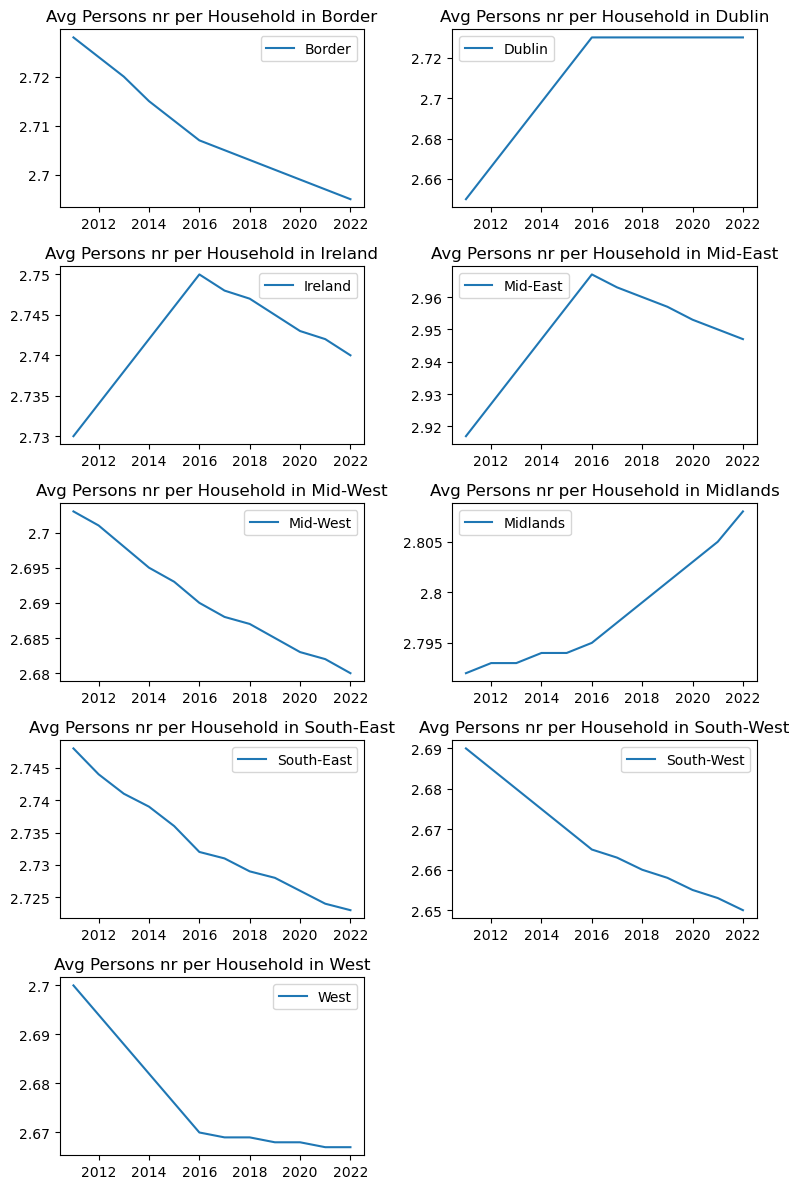

In [377]:
# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(8, 12))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_pop['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_pop['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_pop[df_pop['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['Average Nr of Persons Household'], label=region)
    ax.legend()
    ax.set_title(f'Avg Persons nr per Household in {region}')

    # Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

In [378]:
df_pop.to_csv("F2002_c.csv", index = False)